In [1]:
%pylab inline
import json
import pandas as pd

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
results_file = "../results/experiment_only_experts_ER.json"

In [3]:
results = pd.read_json(results_file, orient='records', lines=True)
results.head()

,network_params,init_opinions_params,init_confidence_params,init_alpha_experts_params,tau,N,frac_experts,n_simul,seed,converged,total_steps,time_elapsed,rmsd_truth_a,rmsd_truth_e,rmsd_truth_all
0,ER_10,uniform,const_0.05,const_0.05,0.0,50,1,6,7,True,7,2.637127,NaN,0.567056,0.567056
1,ER_10,uniform,const_0.05,const_0.05,0.0,50,1,7,8,True,7,2.632005,NaN,0.537232,0.537232
2,ER_10,uniform,const_0.05,const_0.05,0.0,50,1,1,2,True,9,2.663963,NaN,0.547956,0.547956
3,ER_10,uniform,const_0.05,const_0.05,0.0,50,1,3,4,True,10,2.654240,NaN,0.561302,0.561302
4,ER_10,uniform,const_0.05,const_0.05,0.0,50,1,4,5,True,7,2.647485,NaN,0.560111,0.560111


In [5]:
res = []
for group, rows in results.groupby(list(results.columns[:7])):
    
    k_mean = int(group[0].split("_")[1])
    confid = float(group[2].split("_")[1])
    alpha = float(group[3].split("_")[1])
    tau = float(group[4])
    N = int(group[5])
    frac_exp = float(group[6])
    
    rmds_final_mean = rows.rmsd_truth_all.mean()
    rmds_final_std = rows.rmsd_truth_all.std()
    
    res.append([k_mean, confid, alpha, tau, N, frac_exp, rmds_final_mean, rmds_final_std])
    
    
res = pd.DataFrame(res, columns=['k_mean', 'confid', 'alpha', 'tau', 'N', 'frac_exp', 
                                 'rmds_final_mean', 'rmds_final_std'])
res.head()

,k_mean,confid,alpha,tau,N,frac_exp,rmds_final_mean,rmds_final_std
0,10,0.05,0.05,0.0,50,1.0,0.570399,0.033615
1,10,0.05,0.05,0.0,100,1.0,0.574428,0.023855
2,10,0.05,0.05,0.0,200,1.0,0.573679,0.018469
3,10,0.05,0.05,0.1,50,1.0,0.487686,0.037063
4,10,0.05,0.05,0.1,100,1.0,0.489145,0.026205


In [7]:
res_ = res[(res.N == 100)&(res.tau == 0.75)&(res.k_mean == 20)][['confid', 'alpha', 
                                                                 'rmds_final_mean', 'rmds_final_std']]

In [40]:
i = 0
for group, rows in res[(res.k_mean == 20)].groupby(['N', 'tau']):
    i += 1
i

21

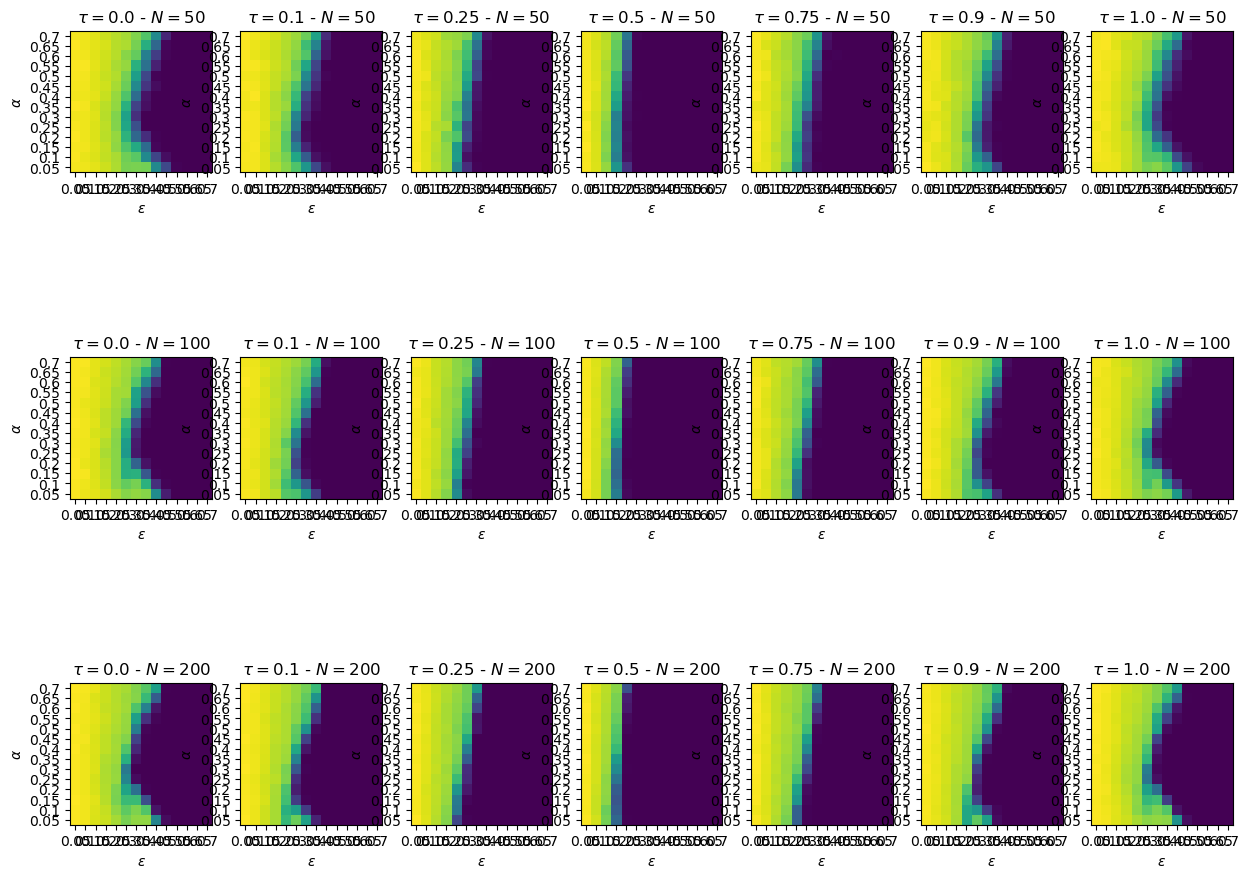

In [56]:
plt.figure(figsize=(15,12))
n_plot = 1
for group, rows in res[(res.k_mean == 20)].sort_values(['N', 'tau']).groupby(['N', 'tau']):
    
    rows = rows[['confid', 'alpha', 'rmds_final_mean', 'rmds_final_std']]
    vals = rows.confid.sort_values().unique().tolist()
    
    #rows.loc[:, 'x'] = rows.confid.apply(lambda i: vals.index(i))
    #rows.loc[:, 'y'] = rows.alpha.apply(lambda i: vals.index(i))
    
    mat = np.empty((len(vals), len(vals)))
    for _, row in rows.iterrows():
        mat[int(vals.index(row.alpha)), int(vals.index(row.confid))] = row.rmds_final_mean
        
    mat = mat[::-1, :]
    
    plt.subplot(3, 7, n_plot)
    ax = plt.matshow(mat, fignum=0)

    #plt.colorbar()

    plt.title(fr"$\tau={group[1]}$ - $N={group[0]}$")
    plt.xlabel(r"$\epsilon$")
    plt.ylabel(r"$\alpha$")
    plt.xticks(range(len(vals)), vals);
    plt.yticks(range(len(vals)), vals[::-1]);
    plt.gca().xaxis.tick_bottom()
    
    n_plot += 1

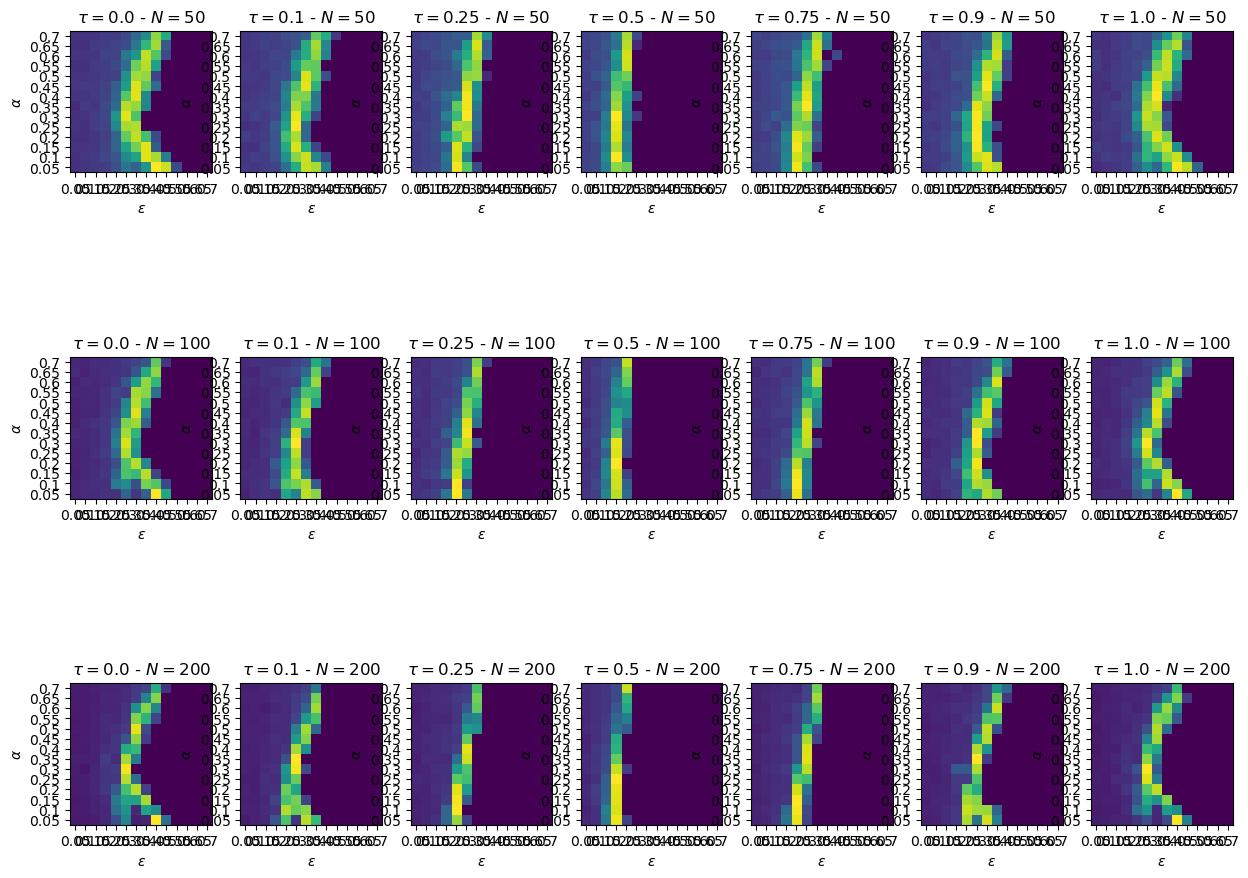

In [57]:
plt.figure(figsize=(15,12))
n_plot = 1
for group, rows in res[(res.k_mean == 20)].sort_values(['N', 'tau']).groupby(['N', 'tau']):
    
    rows = rows[['confid', 'alpha', 'rmds_final_mean', 'rmds_final_std']]
    vals = rows.confid.sort_values().unique().tolist()
    
    #rows.loc[:, 'x'] = rows.confid.apply(lambda i: vals.index(i))
    #rows.loc[:, 'y'] = rows.alpha.apply(lambda i: vals.index(i))
    
    mat = np.empty((len(vals), len(vals)))
    for _, row in rows.iterrows():
        mat[int(vals.index(row.alpha)), int(vals.index(row.confid))] = row.rmds_final_std
        
    mat = mat[::-1, :]
    
    plt.subplot(3, 7, n_plot)
    ax = plt.matshow(mat, fignum=0)

    #plt.colorbar()

    plt.title(fr"$\tau={group[1]}$ - $N={group[0]}$")
    plt.xlabel(r"$\epsilon$")
    plt.ylabel(r"$\alpha$")
    plt.xticks(range(len(vals)), vals);
    plt.yticks(range(len(vals)), vals[::-1]);
    plt.gca().xaxis.tick_bottom()
    
    n_plot += 1

In [13]:
vals = res_.confid.sort_values().unique().tolist()

res_.loc[:, 'x'] = res_.confid.apply(lambda i: vals.index(i))
res_.loc[:, 'y'] = res_.alpha.apply(lambda i: vals.index(i))

In [25]:
mat = np.empty((len(vals), len(vals)))

for _, row in res_.iterrows():
    mat[int(row.y), int(row.x)] = row.rmds_final_mean
    
mat = mat[::-1, :]

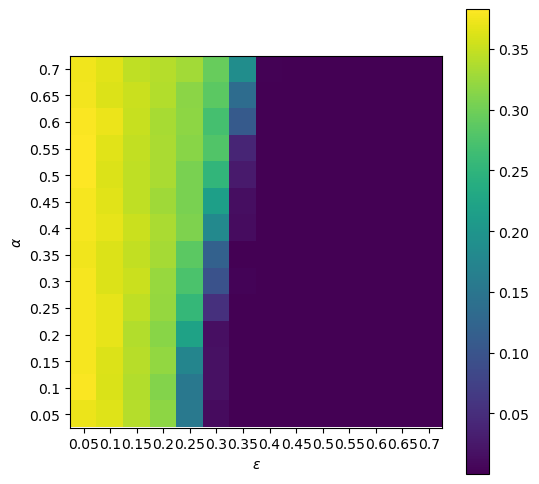

In [39]:
plt.figure(figsize=(6,6))
plt.matshow(mat, fignum=1)

plt.colorbar()

plt.xlabel(r"$\epsilon$")
plt.ylabel(r"$\alpha$")
plt.xticks(range(len(vals)), vals);
plt.yticks(range(len(vals)), vals[::-1]);
plt.gca().xaxis.tick_bottom()